<a href="https://colab.research.google.com/github/Nourhan-Adell/DeepLearning/blob/main/Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat vs Dogs dataset**
https://www.kaggle.com/competitions/dogs-vs-cats/data


In [1]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 13s (32.8 MB/s)
(Reading database ... 155685 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155663 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+

## Download and Inspect the dataset

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-02 17:17:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   114MB/s    in 0.6s    

2022-09-02 17:17:36 (114 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile
zipfile_path= '/content/cats_and_dogs_filtered.zip'
zip_ref= zipfile.ZipFile(zipfile_path, 'r')
zip_ref.extractall()
zip_ref.close()

his module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

In [4]:
import os
base_directory= 'cats_and_dogs_filtered'

print('Base directory content:')
print(os.listdir(base_directory))

Base directory content:
['validation', 'vectorize.py', 'train']


In [5]:
print('Base directory content:')
print(os.listdir(f'{base_directory}/train'))

print('Base directory ci=ontent:')
print(os.listdir(f'{base_directory}/validation'))

Base directory content:
['cats', 'dogs']
Base directory ci=ontent:
['cats', 'dogs']


In [6]:
# Train and validation directories
train_directory= os.path.join(base_directory, 'train')
validation_directory=os.path.join(base_directory, 'validation')

# Directory with trainig cats and dogs pictures
train_cats_dir = os.path.join(train_directory, 'cats')
train_dogs_dir = os.path.join(train_directory, 'dogs')

#Directory with trainig cats and dogs pictures
validation_cats_dir = os.path.join(validation_directory, 'cats')
validation_dogs_dir = os.path.join(validation_directory, 'dogs')

In [7]:
# the name of each image in the directory
train_cats_fname= os.listdir(train_cats_dir)
print(f'the names of cats are: {train_cats_fname}')

train_dogs_fname= os.listdir(train_dogs_dir)
print(f'the names of dogs are: {train_dogs_fname}')


the names of cats are: ['cat.691.jpg', 'cat.992.jpg', 'cat.429.jpg', 'cat.442.jpg', 'cat.772.jpg', 'cat.560.jpg', 'cat.47.jpg', 'cat.680.jpg', 'cat.129.jpg', 'cat.118.jpg', 'cat.542.jpg', 'cat.930.jpg', 'cat.763.jpg', 'cat.681.jpg', 'cat.262.jpg', 'cat.228.jpg', 'cat.555.jpg', 'cat.734.jpg', 'cat.439.jpg', 'cat.926.jpg', 'cat.802.jpg', 'cat.327.jpg', 'cat.886.jpg', 'cat.639.jpg', 'cat.687.jpg', 'cat.474.jpg', 'cat.192.jpg', 'cat.290.jpg', 'cat.743.jpg', 'cat.729.jpg', 'cat.70.jpg', 'cat.275.jpg', 'cat.427.jpg', 'cat.375.jpg', 'cat.947.jpg', 'cat.791.jpg', 'cat.868.jpg', 'cat.581.jpg', 'cat.318.jpg', 'cat.752.jpg', 'cat.941.jpg', 'cat.881.jpg', 'cat.633.jpg', 'cat.64.jpg', 'cat.348.jpg', 'cat.137.jpg', 'cat.328.jpg', 'cat.643.jpg', 'cat.477.jpg', 'cat.413.jpg', 'cat.693.jpg', 'cat.510.jpg', 'cat.709.jpg', 'cat.861.jpg', 'cat.606.jpg', 'cat.156.jpg', 'cat.821.jpg', 'cat.853.jpg', 'cat.13.jpg', 'cat.755.jpg', 'cat.89.jpg', 'cat.447.jpg', 'cat.127.jpg', 'cat.603.jpg', 'cat.475.jpg', 'cat.9

In [8]:
print(f'total training cats images: {len(train_cats_fname)}')
print(f'total training dogs images: {len(train_dogs_fname)}')
print()
print(f'total validation cats images: {len(os.listdir(validation_cats_dir))}')
print(f'total validation dogs images: {len(os.listdir(validation_dogs_dir))}')

total training cats images: 1000
total training dogs images: 1000

total validation cats images: 500
total validation dogs images: 500


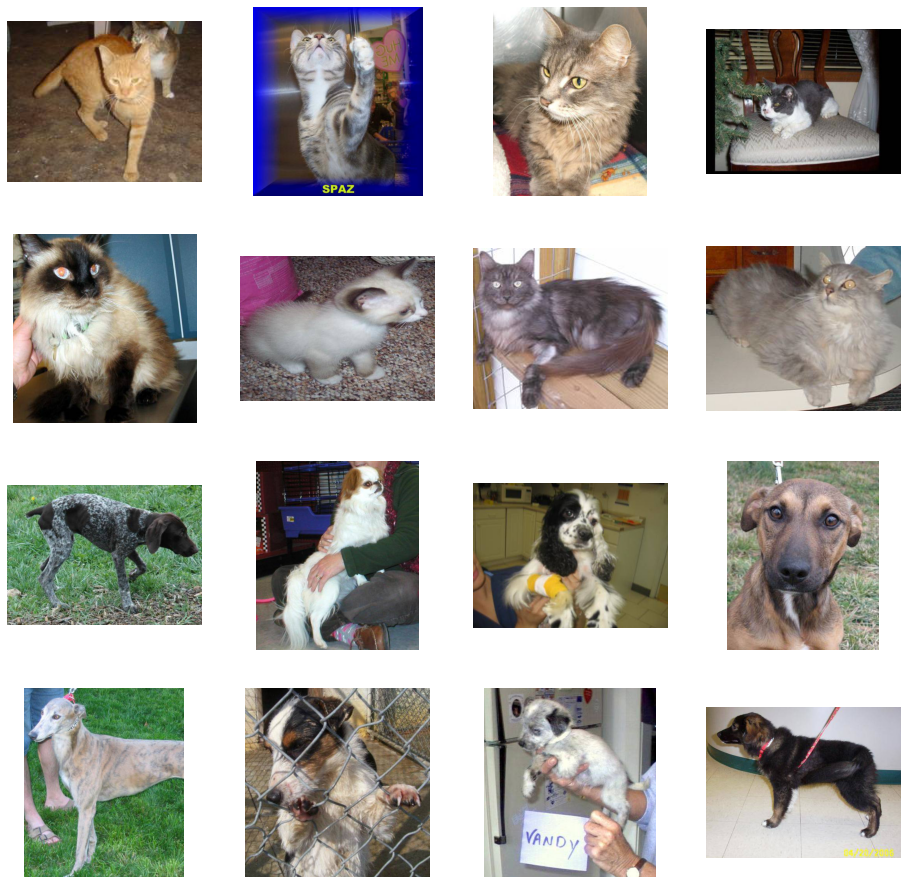

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

nrows=4
ncolumns=4
pic_index=0

fig= plt.gcf()
fig.set_size_inches(nrows*4, ncolumns*4)
pic_index += 8

#iterate on the cats images to print the first 8 cats
next_cat_pix=[os.path.join(train_cats_dir, fname) for fname in train_cats_fname[pic_index - 8 : pic_index]]

#iterate on the dogs images to print the first 8 cats
next_dog_pix=[os.path.join(train_dogs_dir, fname) for fname in train_dogs_fname[pic_index - 8 : pic_index]]

# From the previous two lines of code we have made a two vectors that contain the name of first 8 cates 
# and dogs separately to be able to print then when iterating on the two vectors in the next for loop

for i , img_path in enumerate (next_cat_pix + next_dog_pix):
  sp= plt.subplot(nrows, ncolumns, i+1)
  sp.axis('off')  # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# **Building the model**

In [10]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    # First Layer
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    # Second Layer
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Third Layer
    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    # Flatten Layer
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer= RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics= ['accuracy'])

## **Data Preprocessing**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=(1.0/255.0))
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                     batch_size = 20,
                                                     class_mode = 'binary',
                                                     target_size = (150,150))

validation_generator = validation_datagen.flow_from_directory(validation_directory,
                                                     batch_size = 20,
                                                     class_mode = 'binary',
                                                     target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
            train_generator,
            steps_per_epoch = 100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps = 50
            )

Epoch 1/15
100/100 [==============================] - 14s 89ms/step - loss: 0.8055 - accuracy: 0.5415 - val_loss: 0.6794 - val_accuracy: 0.6070
Epoch 2/15
100/100 [==============================] - 9s 87ms/step - loss: 0.6703 - accuracy: 0.6185 - val_loss: 0.6265 - val_accuracy: 0.6880
Epoch 3/15
100/100 [==============================] - 9s 88ms/step - loss: 0.5887 - accuracy: 0.7040 - val_loss: 0.5884 - val_accuracy: 0.7070
Epoch 4/15
100/100 [==============================] - 10s 104ms/step - loss: 0.5065 - accuracy: 0.7500 - val_loss: 0.5560 - val_accuracy: 0.7340
Epoch 5/15
100/100 [==============================] - 9s 88ms/step - loss: 0.4155 - accuracy: 0.8070 - val_loss: 0.6035 - val_accuracy: 0.7130
Epoch 6/15
100/100 [==============================] - 9s 88ms/step - loss: 0.3338 - accuracy: 0.8525 - val_loss: 0.7501 - val_accuracy: 0.6890
Epoch 7/15
100/100 [==============================] - 9s 88ms/step - loss: 0.2703 - accuracy: 0.8810 - val_loss: 0.7299 - val_accuracy: 0.6

## **Model Prediction**

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.jpg to cat.jpg
[0.00145415]
cat.jpg is a cat


## **Visualizing Intermediate Representations**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


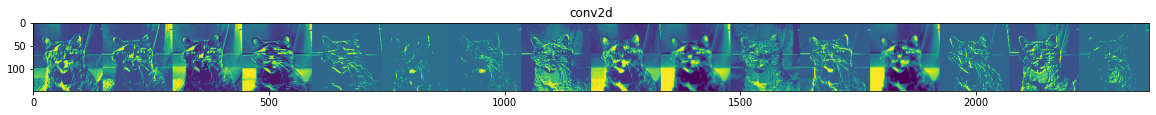

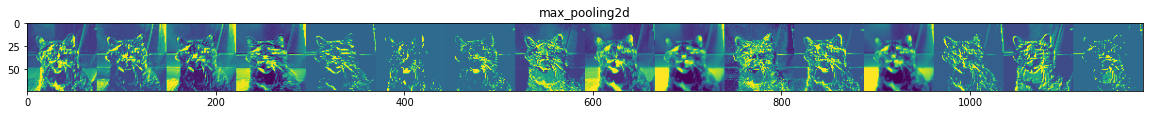

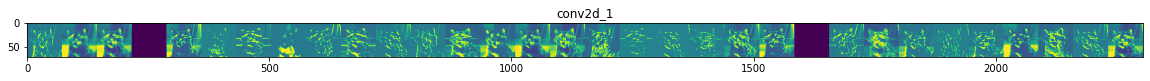

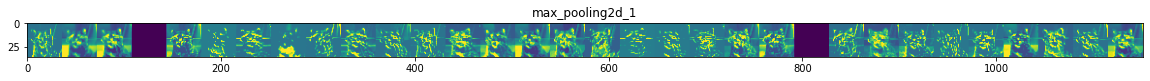

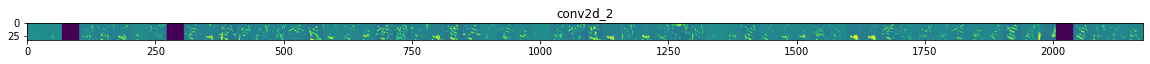

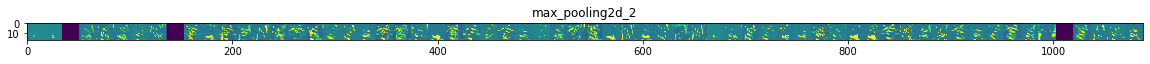

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fname]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fname]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

## **Evaluating Accuracy and Loss for the Model**

Text(0.5, 1.0, 'Training and validation loss')

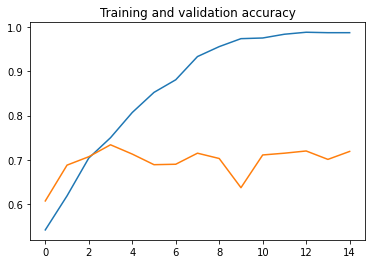

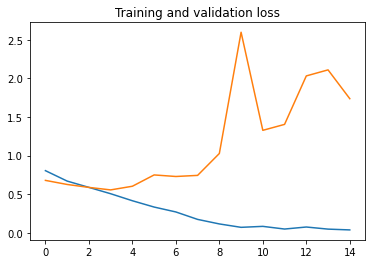

In [20]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

the model is overfitting like it's getting out of fashion. The training accuracy (in blue) gets close to 100% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

# **Clean Up**

In [ ]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )